<a href="https://colab.research.google.com/github/RahulSinghPundir/Hierarchical---Agglomerative-clustering/blob/main/Hierarchical--%3EAgglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the essential library
import numpy as np
import pandas as pd

# Reading the data 
df=pd.read_csv("https://raw.githubusercontent.com/RahulSinghPundir/Hierarchical---Agglomerative-clustering/main/cars_clus.csv")
# take an overview of dataset
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


# Preprocessing the dataset in which 
1> Converting all the features(which are needed in cluster) in numeric form for making model on it.

2> Leaving or drop all the null values because they will affect our model in bad way.

3> Reset the index  and remove all the row which have null data.


In [2]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df=df.dropna()
df=df.reset_index(drop=True)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


#**Selecting & Regularizing the features**

Select all the features and save to a dataframe(data) by which we train our model like engine size, horse power wheelbas, width etc will effect our or help us to create a correct cluster whereas model and manufact etc will not effect our model in good way so do not take it in feature dataframe(data). 

#**Regularizing**

In regularizing we decrese our model complexity and make it rhobust by changing(decreasing) the features value without effecting its importance(effect of it in model). We use regularized fatures to prevent from overfitting and underfitting.
Here we are using MinMax Scaler which is prebuild tool for regularizing our features.

In [3]:
data=df[["engine_s"	,"horsepow",	"wheelbas",	"width"	,"length",	"curb_wgt",	"fuel_cap",	"mpg"]]
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data=scale.fit_transform(data)
# Looking our features(data)
data[0:5,]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# **Euclidean Distances**

This is one of the way to find the dissimilarity or similarity between the two features(2 row).
Euclid distance=_|(x1-x2)^2+(y1-y2)^2+(z2-z1)^2.....
_|=underroot



In [4]:
from sklearn.metrics.pairwise import euclidean_distances
eu_matrix=euclidean_distances(data,data)
eu_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

# **# We have 4 types of Linkage**
1> Normal / Single- In this a cluster(a) with point(p1)have minimum distance with another cluster(b) with point(p2).
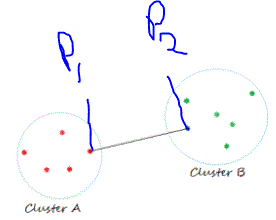 

2> Complete- In this clusters have maximum distance from each other.


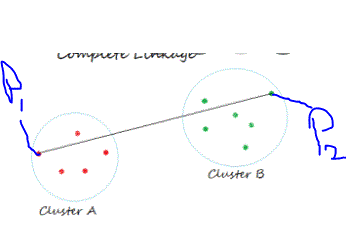

3> Average Linkage- As its name says we find distance from a cluster(a) point(p1) to every point of another cluster(p2) for all points(p1,p2,p3...) and then take its average.
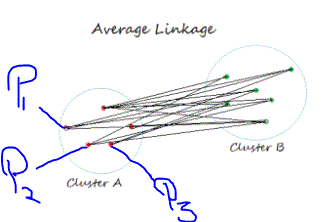  

4> Centroid- In this we take distance from centers/centroids of cluster(a) and cluster(b).

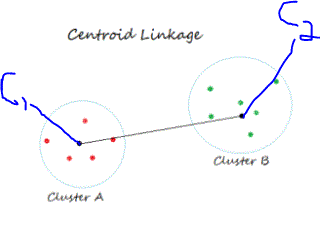

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


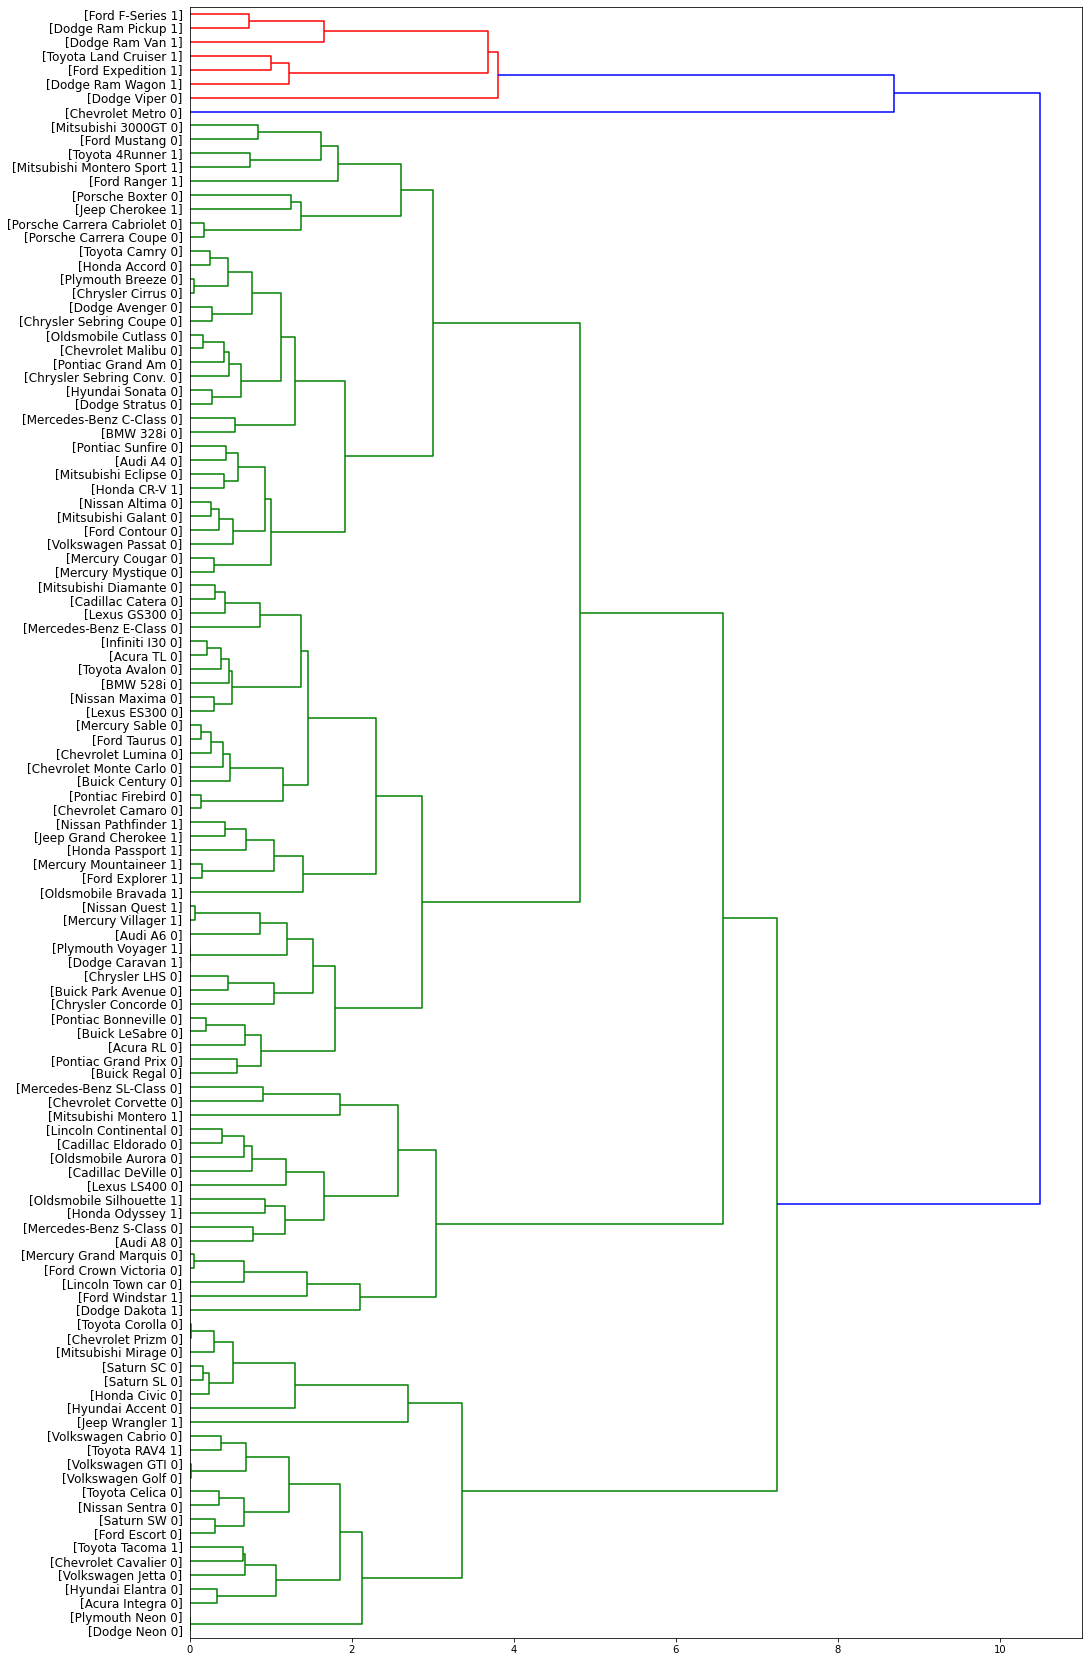

In [5]:
from scipy.cluster import hierarchy
import pylab
Z=hierarchy.linkage(eu_matrix,'complete') 
fig=pylab.figure(figsize=(16,30))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) ) 
D=hierarchy.dendrogram(Z,orientation='right',leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12)


In [9]:
from sklearn.cluster import AgglomerativeClustering
agglo=AgglomerativeClustering(n_clusters=6,linkage='complete')
agglo.fit(eu_matrix)

# make a column in dataframe(dfname label) to store that which feature belong which cluster 0 index belong to 1 cluster(0,1,2,3....) 
df["label"]=agglo.labels_
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,label
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

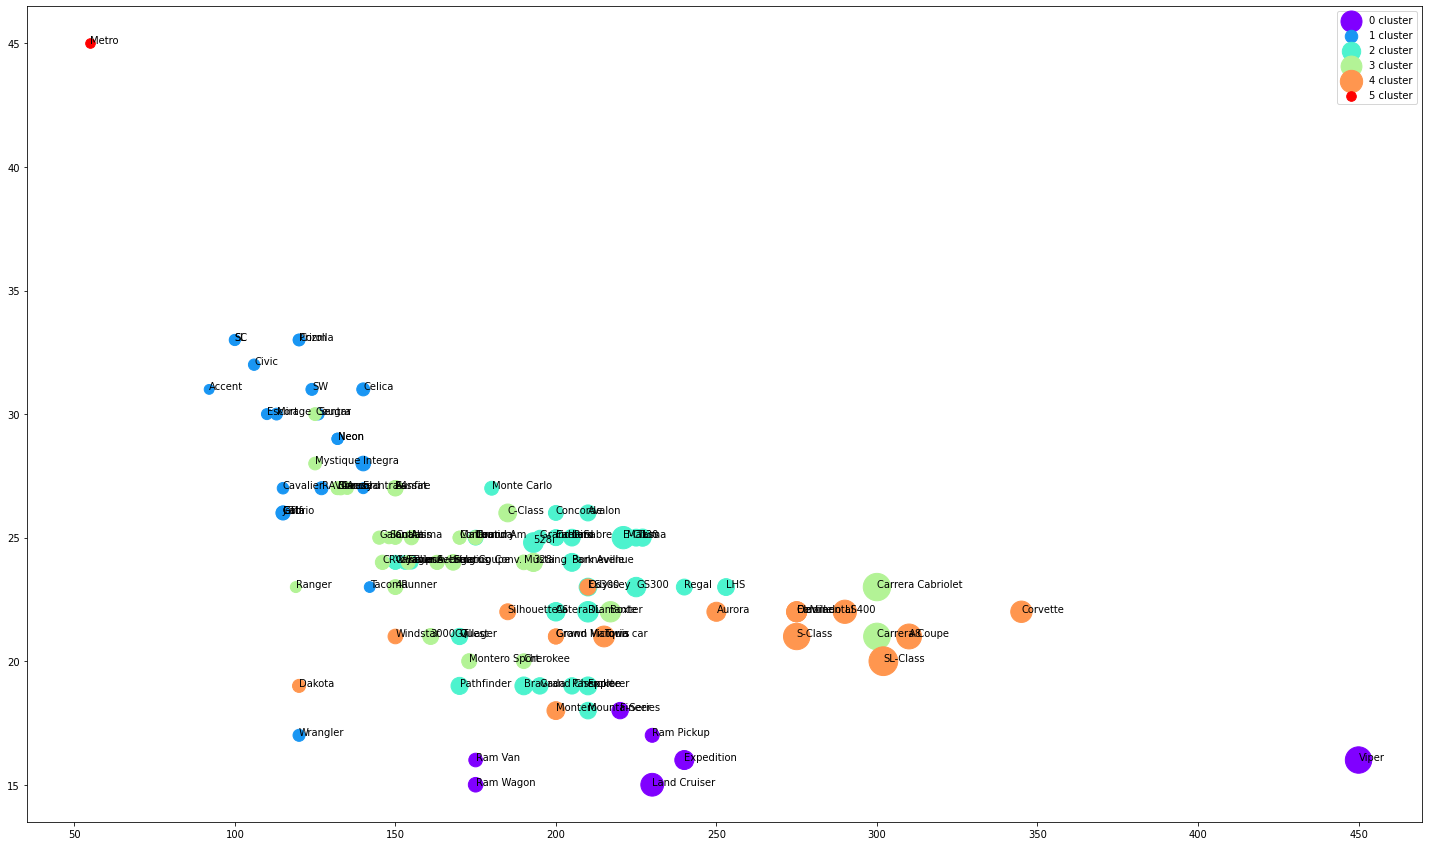

In [7]:
# Creating the graph of horse power and mpg to take an overview of our cluster 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
n_clusters=max(agglo.labels_)+1
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))
plt.figure(figsize=(25,15))
for label,color in zip(cluster_labels,colors):
  subset=df[df.label==label]
  for i in subset.index:
    plt.text(subset.horsepow[i],subset.mpg[i],str(subset['model'][i]))
  plt.scatter(subset.horsepow,subset.mpg,c=color,label=str(label)+' cluster',s=subset.price*10)
plt.legend()
plt.show()
